In [1]:
%reset -f

In [2]:
!pip install -q Pillow

In [3]:
import numpy as np
from PIL import Image, ImageDraw
import itertools
import random

In [4]:
nrows = 200
ncols = 200
ising_steps = 100
gif_ms_dur = 250

In [5]:
def _ising_update(field, n, m, beta):
    total = 0
    N, M = field.shape
    for i in range(n-1, n+2):
        for j in range(m-1, m+2):
            if i == n and j == m:
                continue
            total += field[i % N, j % M]
    dE = 2 * field[n, m] * total
    if dE <= 0:
        field[n, m] *= -1
    elif np.exp(-dE * beta) > np.random.rand():
        field[n, m] *= -1

def ising_step(field, beta=0.4):
    N, M = field.shape
    for n,m in random.sample(list(itertools.product(range(N), range(M))), N*M):
        _ising_update(field, n, m, beta)
    return field

Initial Start State


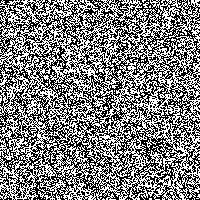

In [6]:
Initial_field = np.random.choice([-1, 1], size=(nrows, ncols))

print("Initial Start State")
Image.fromarray(np.uint8(Initial_field))

In [7]:
states = [Initial_field]

for i in range(ising_steps):
    states.append(ising_step(states[-1].copy()))

### Now all for Pretty Display

In [8]:
images = [Image.fromarray(np.uint8(255* (img>0))) for img in states]

images[0].save("start.png")
images[-1].save("end.png")
images[0].save('ising.gif', save_all=True, append_images=images, duration=gif_ms_dur, loop=0)

In [9]:
label_image = lambda img,i : (ImageDraw.Draw(img).text((10,0),"step: "+ str(i+ 1)+ r"/ "+ str(ising_steps), (255,255,255)),  img)

counter_images  = [label_image(Image.new('RGB', (nrows, 20)), i)[1] for i in range(ising_steps)]
counter_images[0].save('counter.gif', save_all=True, append_images=counter_images, duration=gif_ms_dur, loop=0)

In [10]:
from IPython.display import display
from ipywidgets import widgets, GridspecLayout, AppLayout

headergrid = GridspecLayout(1, 3)
headergrid[0,0] = widgets.HTML("step: 0")
headergrid[0,1] = widgets.Image(value=open('counter.gif', 'rb').read())
headergrid[0,2] = widgets.HTML("step:" +str(ising_steps))

AppLayout(header=headergrid,
          left_sidebar=widgets.Image(value=open('start.png', 'rb').read()),
          center=widgets.Image(value=open('ising.gif', 'rb').read()),
          right_sidebar=widgets.Image(value=open('end.png', 'rb').read()),
          footer=None,
          pane_widths=[1, 1, 1],
          grid_gap='1px',width="auto",hight="auto",justify_items='center',align_items='center')

AppLayout(children=(GridspecLayout(children=(HTML(value='step: 0', layout=Layout(grid_area='widget001')), Imag…